In [2]:
import sys, os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

/home/abbesses/grand/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/abbesses/grand/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Reading files

In [29]:
path_to_mydataset = '/dsimb/abbesses/grand/Documents/Articles/PPI_AGAB_V2/ANABAG/my_dataset/files'
dfm = pd.read_csv(os.path.join(path_to_mydataset,'per_chain_pdbff_informations.tsv'),sep='\t',index_col=0,engine='c')
dfc = pd.read_csv(os.path.join(path_to_mydataset,'cluster_informations.tsv'),sep='\t',index_col=0,engine='c')
dfr = pd.read_csv(os.path.join(path_to_mydataset,'method_resolution.tsv'),sep='\t',index_col=0,engine='c')

pag = pd.read_csv(os.path.join(path_to_mydataset,'per_residue_information_AG.tsv'),engine='c',index_col=0,sep='\t')
pab = pd.read_csv(os.path.join(path_to_mydataset,'per_residue_information_AB.tsv'),engine='c',index_col=0,sep='\t')


## Plot examples

Text(0.5, 1.0, 'Distribution of resolution')

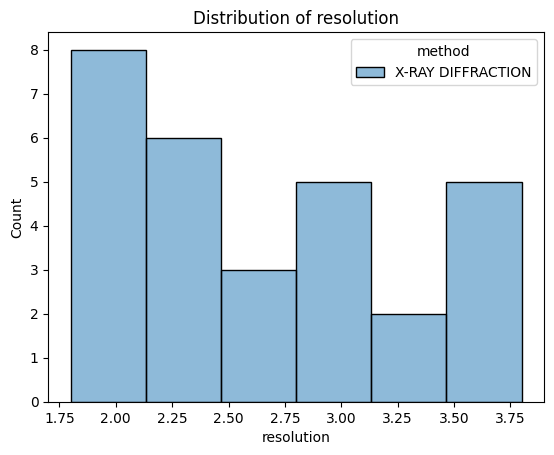

In [4]:
xlab = 'resolution'
ax = sns.histplot(dfr,x=xlab,hue='method')
ax.set_title(f'Distribution of {xlab}')

Text(0.5, 1.0, 'Distribution of pH_pHcrystal')

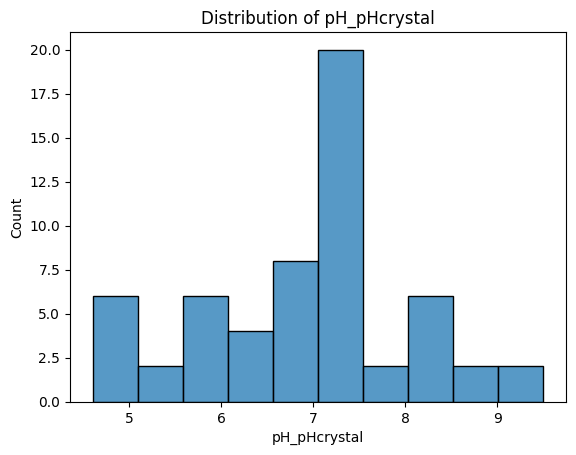

In [5]:
xlab = 'pH_pHcrystal'
ax = sns.histplot(dfm,x=xlab)
ax.set_title(f'Distribution of {xlab}')

Text(0.5, 1.0, 'Distribution of Number_of_glycans')

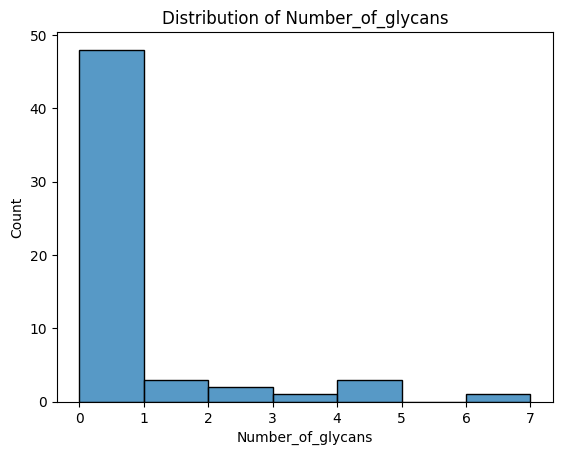

In [6]:
xlab = 'Number_of_glycans'
ax = sns.histplot(dfm,x=xlab)
ax.set_title(f'Distribution of {xlab}')

Text(0.5, 1.0, 'Distribution of Number_of_modelled_residues')

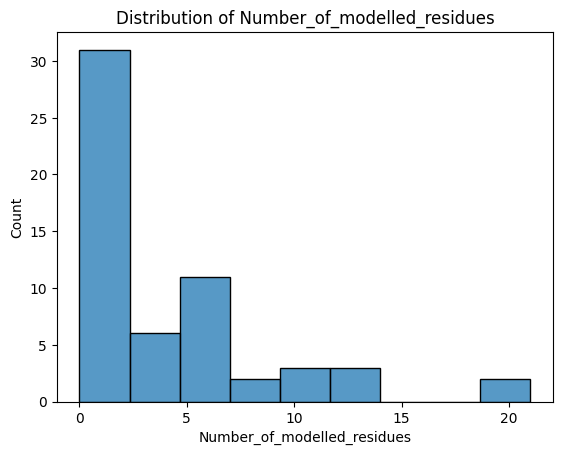

In [7]:
xlab = 'Number_of_modelled_residues'
ax = sns.histplot(dfm,x=xlab)
ax.set_title(f'Distribution of {xlab}')

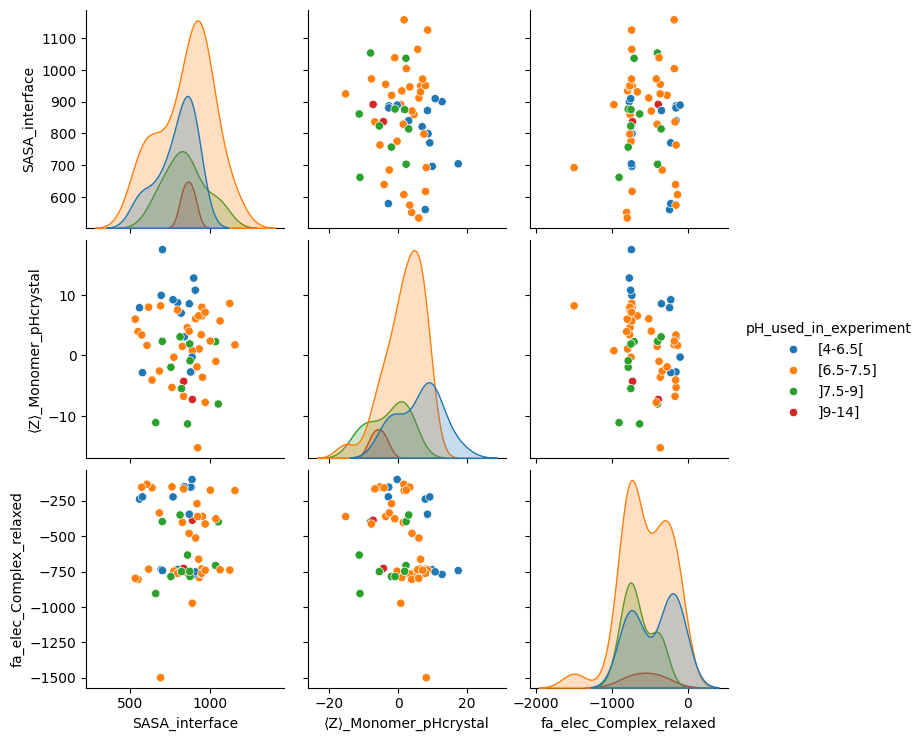

In [ ]:

def show_small_pairplot(df):
    hue_col = 'pH_pHcrystal'
    new_name = 'pH_used_in_experiment'
    df[new_name] = [ '[0-4[' if v < 4 else '[4-6.5[' if v < 6.5 else '[6.5-7.5]' if v <= 7.5 else ']7.5-9]' if v<=9 else ']9-14]'  for v in df[hue_col]]
    cols = ['SASA_interface','⟨Z⟩_Monomer_pHcrystal','fa_elec_Complex_relaxed',new_name]
    sns.pairplot(df[cols], hue=new_name)
    plt.show()

show_small_pairplot(dfm.copy(deep=True))

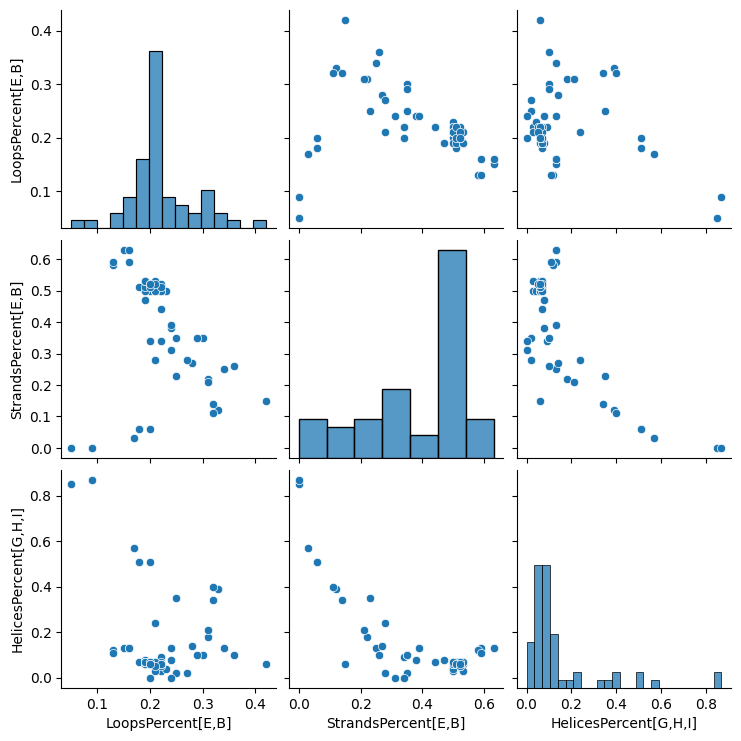

In [24]:

def show_small_pairplot_2(df):
    cols = ['LoopsPercent[E,B]','StrandsPercent[E,B]','HelicesPercent[G,H,I]']
    sns.pairplot(df[cols])
    plt.show()


show_small_pairplot_2(dfm.copy(deep=True))

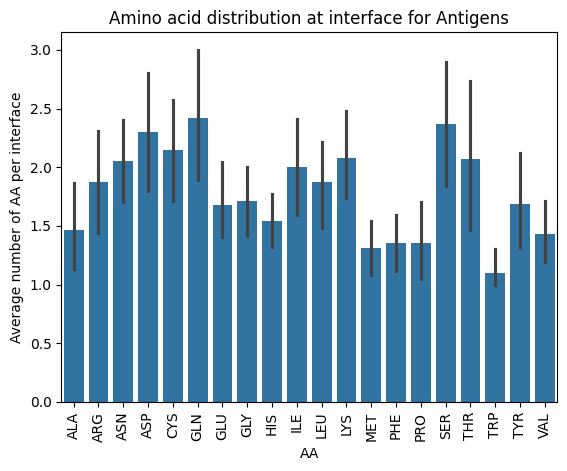

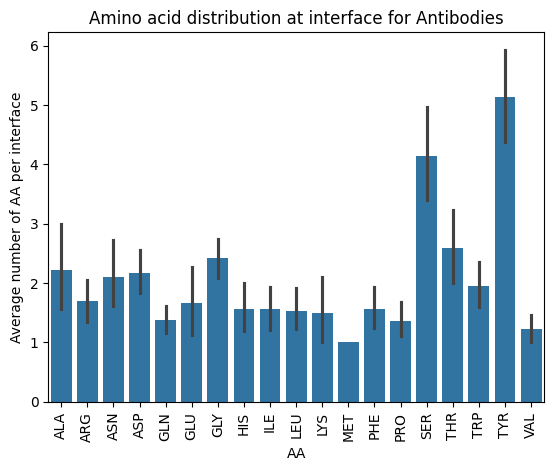

In [33]:
def showAAperCRS(df,title):
    df = df[df['ClassInterface_Model'] != 'Outside']
    df['Number'] = 1
    df = df[['AA','One_digit_id','Number']].groupby(by=['AA','One_digit_id'],as_index=False).sum()
    ax = sns.barplot(df,x='AA',y='Number')
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylabel('Average number of AA per interface')
    plt.show()

showAAperCRS(pag.copy(deep=True),'Amino acid distribution at interface for Antigens')
showAAperCRS(pab.copy(deep=True),'Amino acid distribution at interface for Antibodies')
